In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import cortico_cereb_connectivity.globals as gl
import cortico_cereb_connectivity.run_model as rm
import glob
import matplotlib.pyplot as plt


##  Group vs. individual models 

In [16]:
df=rm.comb_eval(models=['Mds1-ind'])
df['same_subj'] = (df.subj_id==df.eval_subj)

<AxesSubplot:xlabel='eval_subj', ylabel='R_eval'>

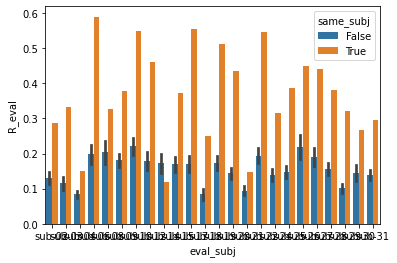

In [17]:
sns.barplot(data=df,x='eval_subj',y='R_eval',hue='same_subj')